# Ejercicio 7
Nambe Mills es una fábrica de vajillas. En https://github.com/franciscokordon/estainferencia/blob/main/data/nambeware.csv figuran, entre otros datos, el diámetro y el precio de la vajilla producida durante un período de tiempo fijo.
* (a) Graficar el precio 𝑦 vs el diámetro 𝑥. Justificar por qué un MLG de Gamma es una opción razonable
* (b) Ajustar este MLG, es decir, encontrar estimaciones puntuales para los parámetros de regresión 𝛽.
* (c) Determinar el error estándar de cada parámetro de regresión

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt

ruta = '/workspaces/Estadistica1/Practica MLG/nambeware.csv'
df = pd.read_csv(ruta, delimiter=',')


In [3]:
df.head()

,Unnamed: 0,Type,Diam,Time,Price
0,0,CassDish,10.7,47.65,144.0
1,1,CassDish,14.0,63.13,215.0
2,2,CassDish,9.0,58.76,105.0
3,3,Bowl,8.0,34.88,69.0
4,4,Dish,10.0,55.53,134.0


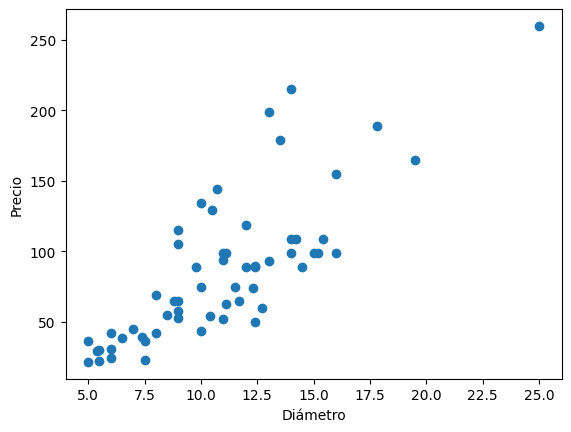

In [5]:
plt.scatter(df['Diam'], df['Price'])
plt.xlabel('Diámetro')
plt.ylabel('Precio')    
plt.show()

Un MLG con distribución Gamma es una opción razonable porque:

* El precio es una variable continua y estrictamente positiva.
* La varianza parece crecer junto con la media (diámetro), lo que es consistente con el comportamiento de la distribución Gamma.
* La función de enlace logarítmica en un MLG Gamma permite modelar relaciones no lineales y proporcionar un ajuste más adecuado en casos donde la relación entre las variables no es lineal y la varianza no es constante.

### 7.b
Ajustar este MLG, es decir, encontrar estimaciones puntuales para los parámetros de regresión 𝛽.

Repetimos lo que hicimos e el ejercicio 6 pero con los valores y parametros de la distribución Gamma.  
Y~ Gamma()  

$\eta = -(\frac{1}{\mu}) = g(\mu) = \beta_0+\beta_1 x$  
$\kappa(\theta)= -log(-\theta)$ y $\phi = \phi$


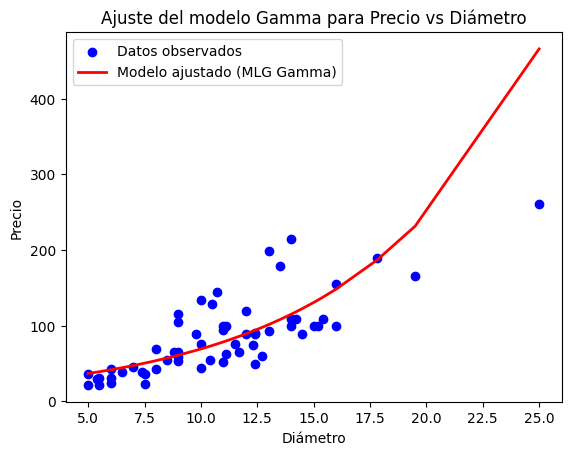

In [19]:
#repetimos lo que hicimos en el ej 6 pero con la distribucion gamma
#intente copiar el codigo modificandolo con esta dist pero me daba cualquier cosa.

from scipy.optimize import minimize

# Definir la log-verosimilitud negativa para la distribución Gamma
def neg_log_likelihood_gamma(beta, X, Y, alpha):
    mu_ = np.exp(np.dot(X, beta))  # Estimación de la media usando la función de enlace logarítmica
    return -np.sum(alpha * (np.log(alpha) - np.log(mu_)) + (alpha - 1) * np.log(Y) - (alpha * Y / mu_))

# Supongamos que 'df' es tu DataFrame que contiene las columnas 'Diam' (diámetro) y 'Price' (precio)
X = df['Diam'].values.reshape(-1, 1)  # Convertimos a matriz columna
Y = df['Price'].values  # Precio (variable dependiente)
alpha = 2  # Parámetro de forma Gamma

# Agregar el intercepto a la matriz X
X_with_intercept = np.c_[np.ones(X.shape[0]), X]  # Agregamos columna de unos (intercepto)

# Estimación inicial de los coeficientes (betas)
beta_init = np.zeros(X_with_intercept.shape[1])

# Optimización para minimizar la log-verosimilitud negativa
result = minimize(neg_log_likelihood_gamma, beta_init, args=(X_with_intercept, Y, alpha))
beta_hat = result.x  # Coeficientes estimados

# Predicciones del modelo Gamma ajustado
mu_hat = np.exp(np.dot(X_with_intercept, beta_hat))

# Ordenar los valores de X y sus predicciones correspondientes para un gráfico más limpio
sorted_indices = np.argsort(X[:, 0])
X_sorted = X[sorted_indices]
mu_hat_sorted = mu_hat[sorted_indices]

# Graficar los datos originales y la curva ajustada
plt.scatter(X, Y, color='blue', label='Datos observados')  # Gráfico de dispersión de los datos observados
plt.plot(X_sorted, mu_hat_sorted, color='red', label='Modelo ajustado (MLG Gamma)', linewidth=2)  # Curva ajustada
plt.xlabel('Diámetro')
plt.ylabel('Precio')
plt.title('Ajuste del modelo Gamma para Precio vs Diámetro')
plt.legend()
plt.show()

### 7.c
Determinar el error estándar de cada parámetro de regresión.


In [21]:
from numpy.linalg import inv

mu = np.exp(X_with_intercept@result.x)
W = np.diag(mu)
I = X_with_intercept.T@W@X_with_intercept
cov_matrix = inv(I)
cov_matrix


array([[ 1.58100627e-03, -1.04489068e-04],
       [-1.04489068e-04,  7.84785374e-06]])

In [22]:
se_b0 = np.sqrt(cov_matrix[0,0])
se_b1 = np.sqrt(cov_matrix[1,1])
print("se(b0) =",se_b0)
print("se(b1) =",se_b1)

se(b0) = 0.039761869609889915
se(b1) = 0.002801402102038402
